In [1]:
# Setup
import warnings; warnings.simplefilter('ignore')
# set this to your working directory
WORKING_DIR = '/home/elliott/Dropbox/_Ash_Teaching/2018-09 - Bocconi - Text Data and ML/code'
import os
os.chdir(WORKING_DIR)
%matplotlib notebook
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

X = pd.read_pickle('X.pkl').toarray()
vocab = pd.read_pickle('vocab.pkl')
df1 = pd.read_csv('death-penalty-cases.csv')
Y = df1['citeCount'] > 0

In [2]:
# Bagging classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=50,
        max_samples=100, bootstrap=True, n_jobs=-1
    )

cross_val_score(bag_clf, X, Y).mean()

0.71735000889893019

In [3]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=16, 
                                 n_jobs=-1)
y_pred_rf = cross_val_predict(rnd_clf, X, Y)                              
confusion_matrix(Y,y_pred_rf)

array([[ 1674,  7067],
       [ 1848, 21978]])

In [4]:
rnd_clf.fit(X,Y)
feature_importances = rnd_clf.feature_importances_
sorted(zip(feature_importances, vocab),reverse=True)[:20]

[(0.05943716986778172, 'penalty published'),
 (0.053679697404556616, 'quot'),
 (0.048854275189082412, 'felony non death'),
 (0.045695533278347897, 'death penalty published'),
 (0.040214290597660823, 'non death penalty'),
 (0.040088231040026921, 'felony non'),
 (0.038680653336024814, 'published'),
 (0.03817915463579663, 'non death'),
 (0.03209131711063333, 'non'),
 (0.030908387180549498, 'state did seek'),
 (0.028740195027975066, 'state did'),
 (0.028341292647255188, 'felony'),
 (0.025116924010195801, 'sanctions'),
 (0.023345362081791221, 'did seek death'),
 (0.023211248331465695, 'imposed'),
 (0.022892266419064854, 'death penalty sanctions'),
 (0.022208526317654152, 'penalty sanctions'),
 (0.020931977327193537, 'did seek'),
 (0.018422289392439666, 'jury'),
 (0.017987418061452716, 'criminal')]

In [5]:
# XGBoost
from xgboost import XGBClassifier, XGBRegressor
dfX = pd.DataFrame(X,columns=vocab)
xgb_clf = XGBClassifier()
cross_val_score(xgb_clf, dfX, Y).mean()

0.735343835315594

In [8]:
xgb_reg = XGBRegressor(feature_names=vocab)
xgb_reg.fit(dfX,Y)
sorted(zip(xgb_reg.feature_importances_, vocab),reverse=True)[:10]

[(0.081751823, 'quot'),
 (0.026277373, 'criminal'),
 (0.023357663, 'texas'),
 (0.023357663, 'felony'),
 (0.018978102, 'case'),
 (0.017518248, 'seek'),
 (0.017518248, 'sanctions'),
 (0.017518248, 'petitioner'),
 (0.016058395, 'state'),
 (0.016058395, 'non death')]

<IPython.core.display.Javascript object>


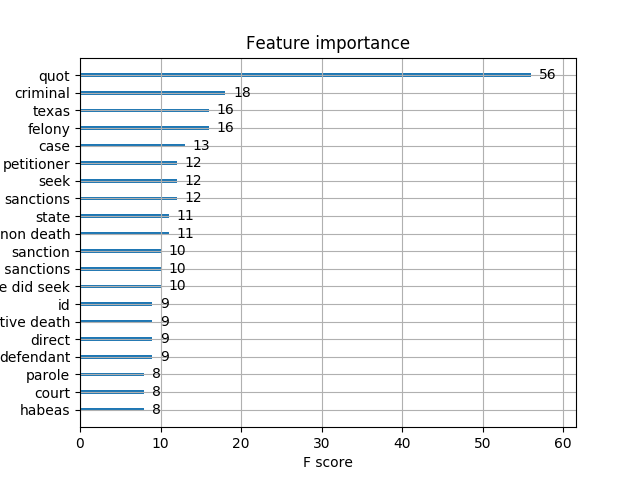

In [9]:
from xgboost import plot_importance
plot_importance(xgb_reg, max_num_features=20)